<a href="https://colab.research.google.com/github/fedhere/MLPNS_FBianco/blob/main/DeepLearning/NN_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

from https://iamtrask.github.io/2015/07/12/basic-python-network/ with minor modifications

In [1]:
import numpy as np
import pylab as pl

# trivial NN for classification

predict:
 [[0]
 [1]
 [1]
 [0]]
based on:
 [[0 0 1]
 [1 1 1]
 [1 0 1]
 [0 1 1]]


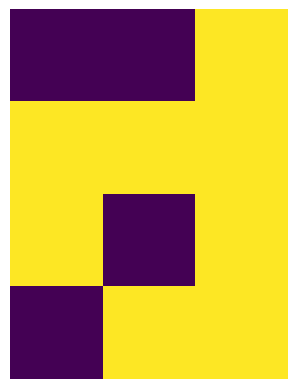

In [2]:
X = np.array([ [0,0,1],
              [1,1,1],
              [1,0,1],
              [0,1,1] ])
pl.imshow(X)
pl.axis('off')

y = np.array([[0,1,1,0]]).T
print("predict:\n", y)
print("based on:\n", X)

# architecture: 1 layer

input layer 4x3: 

4 observations 

3 features

neurons layer: 3x1

$[4\times3] \cdot [3\times1] => [1]$


In [3]:
# define the loss function
def loss(prediction, target):
    return target - prediction

def loss3(prediction, target):
    return (target - prediction)**3


In [4]:
#define the activation function
def sigmoid(x):
  return 1. / (1 + np.exp(-x))

In [5]:
#define the derivative of the activation function
def dsigmoid(x):
  return x * (1 - x)

In [6]:
training = 6000
# build the synopsis: THE WEIGHTS, the initial guess of the weights. 
# we have no knowledge, so we just randomize it


# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(302)

# initialize weights randomly with mean 0
syn0 = 2 * np.random.random((3,1)) - 1 # THIS IS THE FIRST LAYW OF 3 NEURONS
print(syn0.shape)
loss_output = [] # container for global loss to plot
for iter in range(training):

   # forward propagation step
    inputLayer = X
    #dot product
    l1 = np.dot(inputLayer, syn0)
    #activate
    output = sigmoid(l1)

    # how much did we miss by?
    output_error = loss(output, y)
    loss_output.append(np.abs(output_error).sum())
    # back propagation step
    # multiply how much we missed by the
    # slope of the sigmoid at the values of L1  
    output_delta = output_error * dsigmoid(output)
    # how much did we miss?

 
    # update weights
    syn0 += np.dot(inputLayer.T, output_delta)
print ("Output After Training:\n", output)
print ("target: \n", y)


(3, 1)
Output After Training:
 [[0.01254551]
 [0.98977455]
 [0.99169035]
 [0.0101995 ]]
target: 
 [[0]
 [1]
 [1]
 [0]]


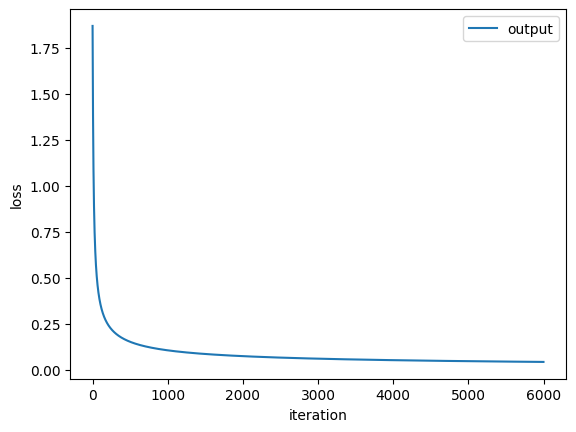

In [7]:
import pylab as pl
pl.plot(loss_output, label="output")
pl.legend()
pl.xlabel("iteration")
pl.ylabel("loss");

# architecture: 2 layer

input layer 4x3: observations 3 features

neurons layer: 3x4, 4x1

$[4\times3] \cdot [3\times4] \cdot [4\times1] => [1]$

In [8]:
np.random.seed(302)

# randomly initialize our weights with mean 0
syn0 = 2 * np.random.random((3, 4)) - 1
syn1 = 2 * np.random.random((4, 1)) - 1

print (syn0.shape, "\n", syn1.shape)

loss_hidden = []
loss_output = []

# 2 layers
for iterate in range(training):
  inputLayer = X  
  #dot product
  la1 = np.dot(inputLayer, syn0)
  #activate
  layer1out = sigmoid(la1)

  la2 = np.dot(layer1out, syn1)
  #activate
  outputLayer = sigmoid(la2)
  
  #calculate loss on the output layer
  outputLayer_error = loss(outputLayer, y)
  loss_output.append(np.abs(outputLayer_error).sum()) # for the plot

  outputLayer_delta = outputLayer_error * dsigmoid(outputLayer)
  #print(outputLayer_delta)

  l1_error = outputLayer_delta.dot(syn1.T)
  loss_hidden.append(np.abs(l1_error).sum())
  l1_delta = l1_error * dsigmoid(layer1out)
  
  # back propagation step
  # multiply how much we missed by the
  # slope of the sigmoid at the values in l1

  syn1 += outputLayer.T.dot(outputLayer_delta)
  syn0 += inputLayer.T.dot(l1_delta)
  
print ("Final Prediction:\n", outputLayer)

print ("target: \n", y)


(3, 4) 
 (4, 1)
Final Prediction:
 [[0.29681241]
 [0.83799922]
 [0.83961019]
 [0.29549488]]
target: 
 [[0]
 [1]
 [1]
 [0]]


Text(0, 0.5, 'loss')

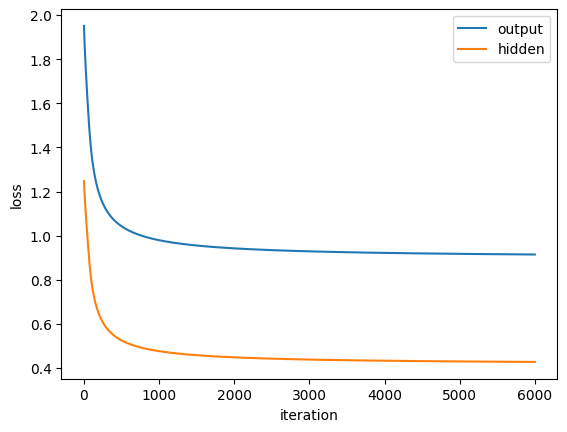

In [9]:
import pylab as pl
pl.plot(loss_output, label="output")
pl.plot(loss_hidden, label="hidden")
pl.legend()
pl.xlabel("iteration")
pl.ylabel("loss")

In [10]:
np.random.seed(302)

# randomly initialize our weights with mean 0
syn0 = 2 * np.random.random((3, 5)) - 1
syn1 = 2 * np.random.random((5, 1)) - 1

print (syn0.shape, "\n", syn1.shape)

loss_hidden = []
loss_output = []

# 2 layers
for iterate in range(training):
  inputLayer = X  
  #dot product
  la1 = np.dot(inputLayer, syn0)
  #activate
  layer1out = sigmoid(la1)

  la2 = np.dot(layer1out, syn1)
  #activate
  outputLayer = sigmoid(la2)
  
  #calculate loss on the output layer
  outputLayer_error = loss3(outputLayer, y)
  loss_output.append(np.abs(outputLayer_error).sum())
  outputLayer_delta = outputLayer_error * dsigmoid(outputLayer)

  l1_error = outputLayer_delta.dot(syn1.T)
  loss_hidden.append(np.abs(l1_error).sum())
  l1_delta = l1_error * dsigmoid(layer1out)
 
  # back propagation step
  # multiply how much we missed by the
  # slope of the sigmoid at the values in l1

  syn1 += outputLayer.T.dot(outputLayer_delta)
  syn0 += inputLayer.T.dot(l1_delta)
  
print ("Final Prediction:\n", outputLayer)

print ("target: \n", y)


(3, 5) 
 (5, 1)
Final Prediction:
 [[0.39106946]
 [0.66578556]
 [0.67452176]
 [0.38267764]]
target: 
 [[0]
 [1]
 [1]
 [0]]


Text(0, 0.5, 'loss')

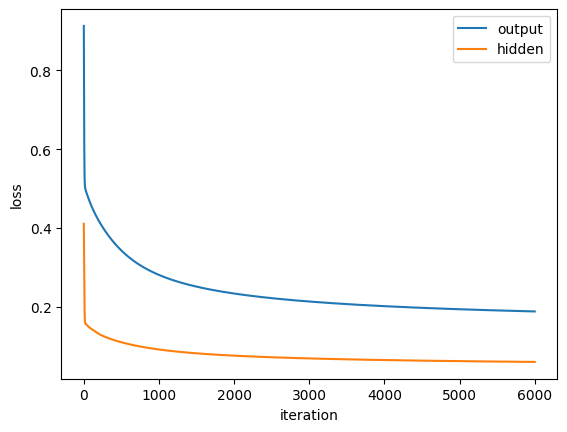

In [11]:
import pylab as pl
pl.plot(loss_output, label="output")
pl.plot(loss_hidden, label="hidden")
pl.legend()
pl.xlabel("iteration")
pl.ylabel("loss")

# Tensorflow Implementation (for comparison)

In [12]:
from tensorflow import keras

In [13]:
hlayer = keras.layers.Dense(5, input_dim=3, activation="sigmoid")
olayer = keras.layers.Dense(1, activation="linear")
model = keras.Sequential([hlayer, olayer])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 20        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss = "mae", optimizer="adam", metrics=["accuracy", "mae"])

In [18]:
history = model.fit(X, y, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.1517 - accuracy: 1.0000 - mae: 0.1517
Epoch 2/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.1510 - accuracy: 1.0000 - mae: 0.1510
Epoch 3/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.1507 - accuracy: 1.0000 - mae: 0.1507
Epoch 4/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.1500 - accuracy: 1.0000 - mae: 0.1500
Epoch 5/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.1492 - accuracy: 1.0000 - mae: 0.1492
Epoch 6/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.1486 - accuracy: 1.0000 - mae: 0.1486
Epoch 7/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.1480 - accuracy: 1.0000 - mae: 0.1480
Epoch 8/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.1474 - accuracy: 1.0000 - mae: 0.1474
Epoch 9/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.1468 - accuracy: 1.0000 - m

Text(0.5, 0, 'loss')

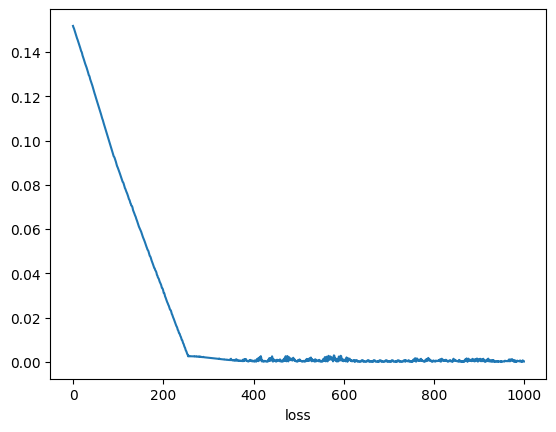

In [19]:
pl.plot(history.history['loss']),
pl.xlabel("epoch")
pl.xlabel("loss")

In [20]:
model.predict(X)

1/1 [==============================] - 0s 82ms/step


array([[-3.5881996e-04],
       [ 9.9918234e-01],
       [ 9.9950707e-01],
       [-7.3820353e-04]], dtype=float32)

In [21]:
y

array([[0],
       [1],
       [1],
       [0]])